# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Haikal Batubara
- **Email:** m248b4ky2870@bangkit.academy
- **ID Dicoding:** haikal_batubara

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berubah berdasarkan musim dan hari kerja/libur?
- Kapan waktu puncak penggunaan sepeda dalam satu hari dan bagaimana perbedaannya antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

## Data Wrangling

### Gathering Data

In [2]:
# Memuat data dari day.csv dan hour.csv
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan beberapa baris pertama dari masing-masing dataset
print("Data dari day.csv:")
print(day_data.head())

print("\nData dari hour.csv:")
print(hour_data.head())

Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data d

### Assessing Data

#### Missing Values

In [3]:
# Memeriksa missing values
print("\nJumlah missing values di day.csv:")
print(day_data.isnull().sum())

print("\nJumlah missing values di hour.csv:")
print(hour_data.isnull().sum())


Jumlah missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Invalid Values

In [4]:
# Memeriksa range nilai untuk kolom yang penting
print("\nRentang nilai di day.csv:")
print(day_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())

print("\nRentang nilai di hour.csv:")
print(hour_data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe())


Rentang nilai di day.csv:
             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000  

Rentang nilai di hour.csv:
        

#### Duplicate Data

In [5]:
# Memeriksa duplicate data
print("\nJumlah data duplikat di day.csv:")
print(day_data.duplicated().sum())

print("\nJumlah data duplikat di hour.csv:")
print(hour_data.duplicated().sum())


Jumlah data duplikat di day.csv:
0

Jumlah data duplikat di hour.csv:
0


#### Outliers

In [6]:
def detect_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
        print(f"\nJumlah outlier di kolom {column}: {len(outliers)}")

# Memeriksa outliers di day_data dan hour_data
detect_outliers(day_data, ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
detect_outliers(hour_data, ['temp', 'atemp', 'hum', 'windspeed', 'cnt'])


Jumlah outlier di kolom temp: 0

Jumlah outlier di kolom atemp: 0

Jumlah outlier di kolom hum: 2

Jumlah outlier di kolom windspeed: 13

Jumlah outlier di kolom cnt: 0

Jumlah outlier di kolom temp: 0

Jumlah outlier di kolom atemp: 0

Jumlah outlier di kolom hum: 22

Jumlah outlier di kolom windspeed: 342

Jumlah outlier di kolom cnt: 505


### Cleaning Data

#### Membuar Salinan untuk Data Cleaning

In [7]:
# Menyimpan salinan ke dalam folder dashboard
day_data.to_csv('dashboard/day_data.csv', index=False)
hour_data.to_csv('dashboard/hour_data.csv', index=False)

print("Data sudah disimpan ke dalam folder dashboard.")

Data sudah disimpan ke dalam folder dashboard.


#### Handling Invalid Humidity (0%)

In [8]:
# Menghitung median untuk kolom hum
median_day_hum = day_data['hum'].replace(0, pd.NA).median()
median_hour_hum = hour_data['hum'].replace(0, pd.NA).median()

# Mengganti nilai 0 pada kolom hum dengan median
day_data['hum'] = day_data['hum'].replace(0, median_day_hum)
hour_data['hum'] = hour_data['hum'].replace(0, median_hour_hum)

# Verifikasi setelah penggantian
print("\nVerifikasi nilai 0 di kolom hum setelah cleaning pada day_data.csv:")
print(day_data[day_data['hum'] == 0])

print("\nVerifikasi nilai 0 di kolom hum setelah cleaning pada hour_data.csv:")
print(hour_data[hour_data['hum'] == 0])


Verifikasi nilai 0 di kolom hum setelah cleaning pada day_data.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Verifikasi nilai 0 di kolom hum setelah cleaning pada hour_data.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


#### Outliers in Windspeed

In [9]:
# Menghitung batas atas untuk kolom windspeed
upper_limit_day_windspeed = day_data['windspeed'].quantile(0.95)
upper_limit_hour_windspeed = hour_data['windspeed'].quantile(0.95)

# Menerapkan capping untuk kolom windspeed
day_data['windspeed'] = day_data['windspeed'].clip(upper=upper_limit_day_windspeed)
hour_data['windspeed'] = hour_data['windspeed'].clip(upper=upper_limit_hour_windspeed)

# Memuat data yang sudah dibersihkan
day_data = pd.read_csv('dashboard/day_data.csv')
hour_data = pd.read_csv('dashboard/hour_data.csv')

#### Outliers in Cnt

In [10]:
# Statistik deskriptif untuk kolom cnt
cnt_stats = hour_data['cnt'].describe()
print("Statistik deskriptif untuk cnt di hour.csv:")
print(cnt_stats)

# Menghitung batas atas untuk kolom cnt
upper_limit_cnt = hour_data['cnt'].quantile(0.95)
hour_data['cnt'] = hour_data['cnt'].clip(upper=upper_limit_cnt)

# Menyimpan data yang sudah dibersihkan
day_data.to_csv('dashboard/day_data.csv', index=False)
hour_data.to_csv('dashboard/hour_data.csv', index=False)

Statistik deskriptif untuk cnt di hour.csv:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


## Exploratory Data Analysis (EDA)

#### Visualisasi Distribusi

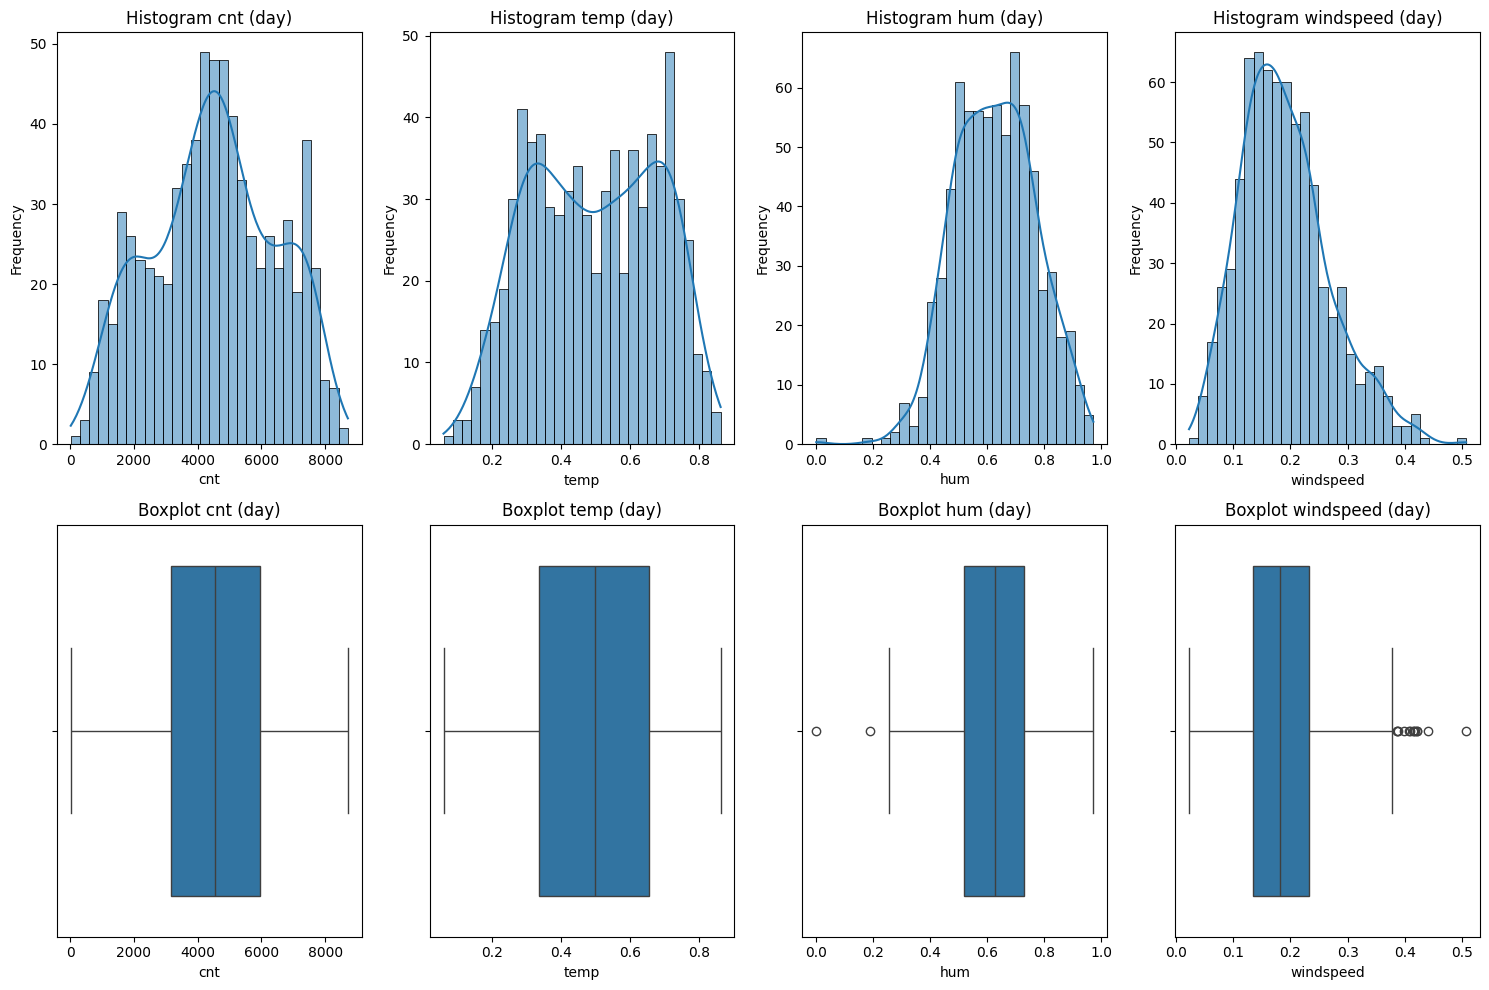

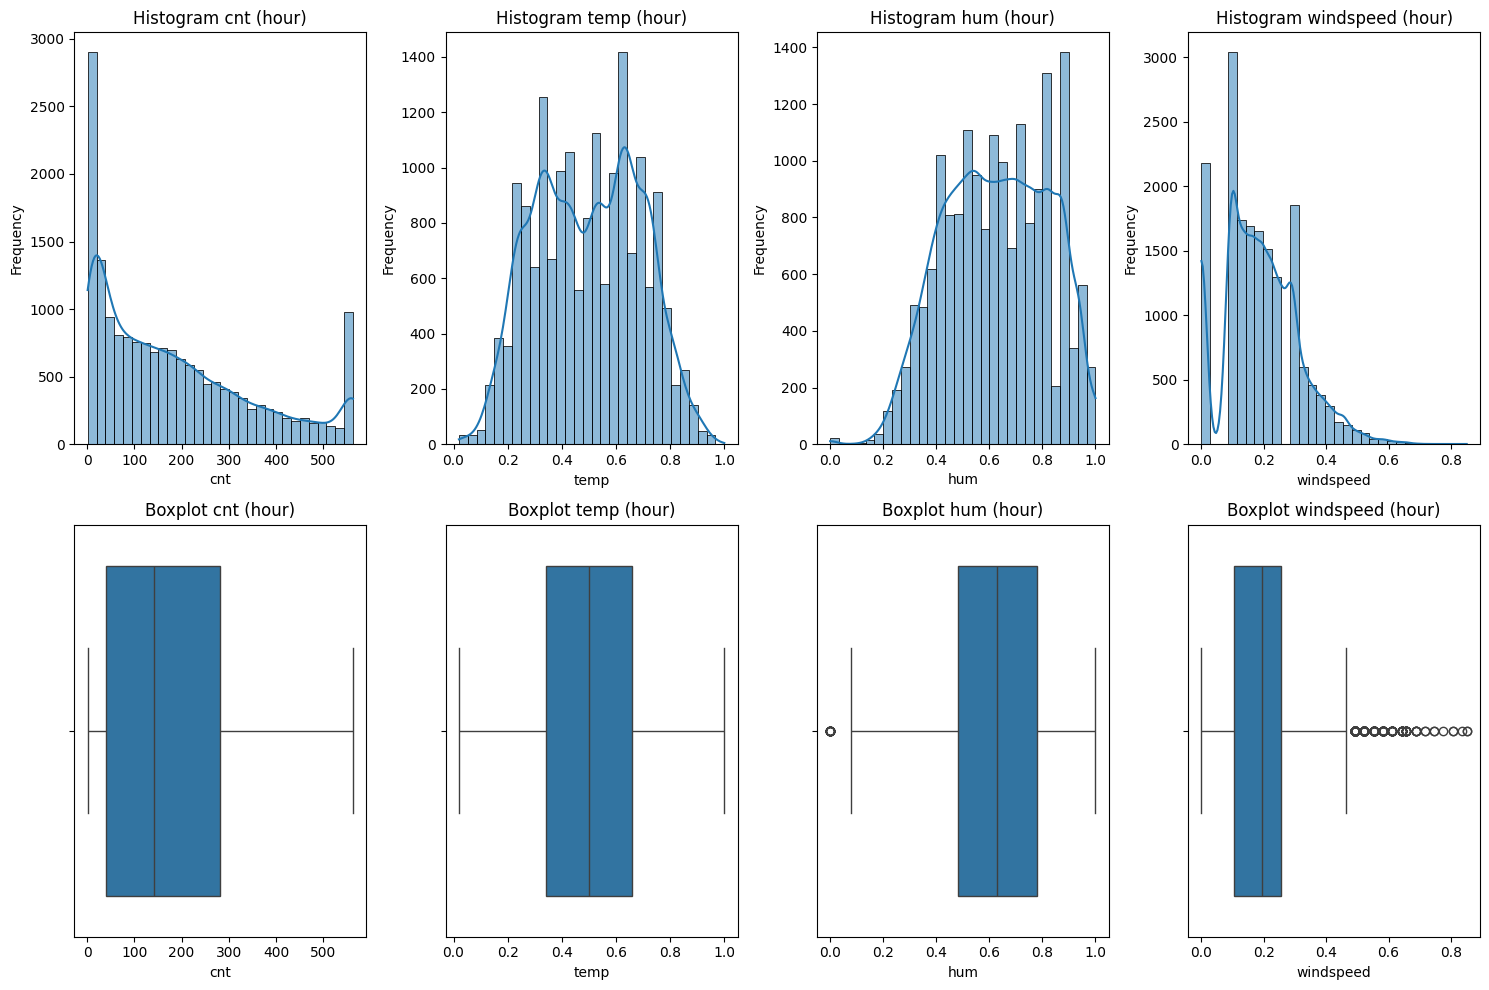

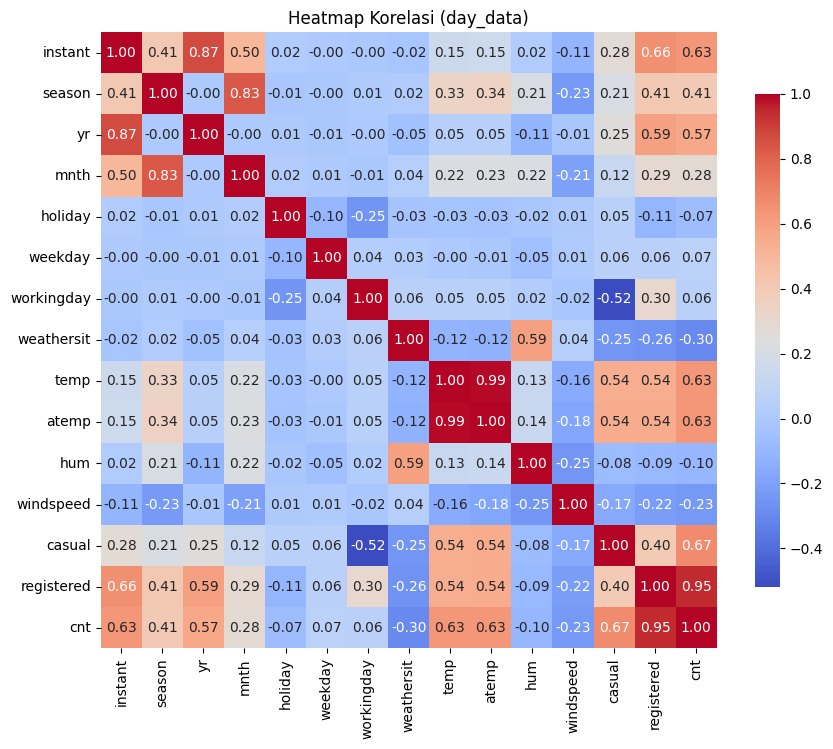

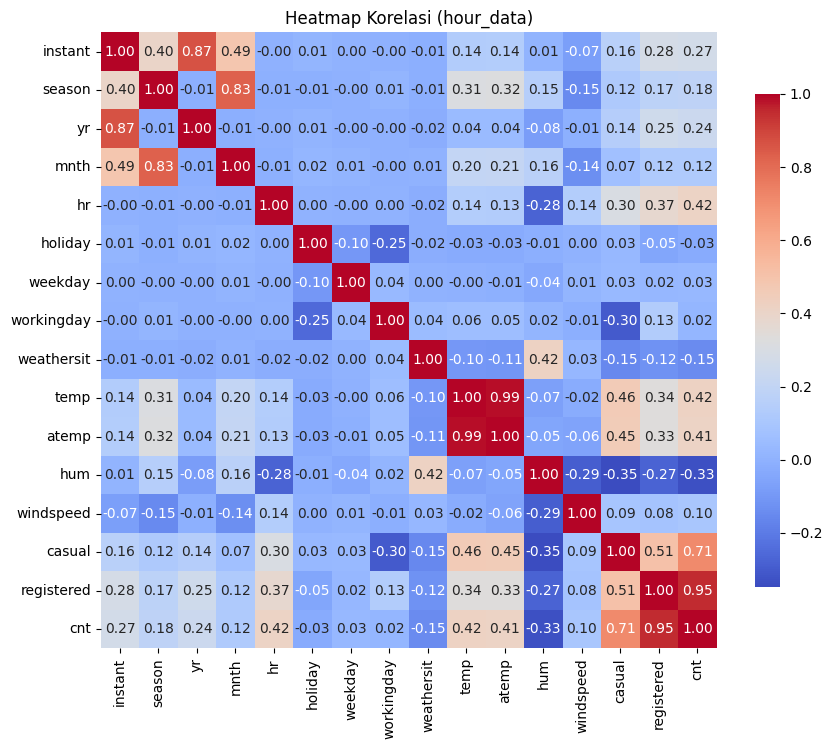

In [11]:
# Memuat data yang sudah dibersihkan
day_data = pd.read_csv('dashboard/day_data.csv')
hour_data = pd.read_csv('dashboard/hour_data.csv')

# 1. Histogram dan Boxplot untuk day_data
variables_to_plot_day = ['cnt', 'temp', 'hum', 'windspeed']

plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_to_plot_day, 1):
    # Histogram
    plt.subplot(2, 4, i)
    sns.histplot(day_data[variable], bins=30, kde=True)
    plt.title(f'Histogram {variable} (day)')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(2, 4, i + 4)
    sns.boxplot(x=day_data[variable])
    plt.title(f'Boxplot {variable} (day)')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

# 2. Histogram dan Boxplot untuk hour_data
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_to_plot_day, 1):
    # Histogram
    plt.subplot(2, 4, i)
    sns.histplot(hour_data[variable], bins=30, kde=True)
    plt.title(f'Histogram {variable} (hour)')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(2, 4, i + 4)
    sns.boxplot(x=hour_data[variable])
    plt.title(f'Boxplot {variable} (hour)')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()

# 3. Heatmap untuk korelasi variabel
# Hanya ambil kolom numerik untuk perhitungan korelasi
numeric_day_data = day_data.select_dtypes(include=['float64', 'int64'])
numeric_hour_data = hour_data.select_dtypes(include=['float64', 'int64'])

# Heatmap untuk day_data
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_day_data.corr()  # Untuk day_data
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Heatmap Korelasi (day_data)')
plt.show()

# Heatmap untuk hour_data
plt.figure(figsize=(10, 8))
correlation_matrix_hour = numeric_hour_data.corr()  # Untuk hour_data
sns.heatmap(correlation_matrix_hour, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Heatmap Korelasi (hour_data)')
plt.show()


#### Analisis Waktu

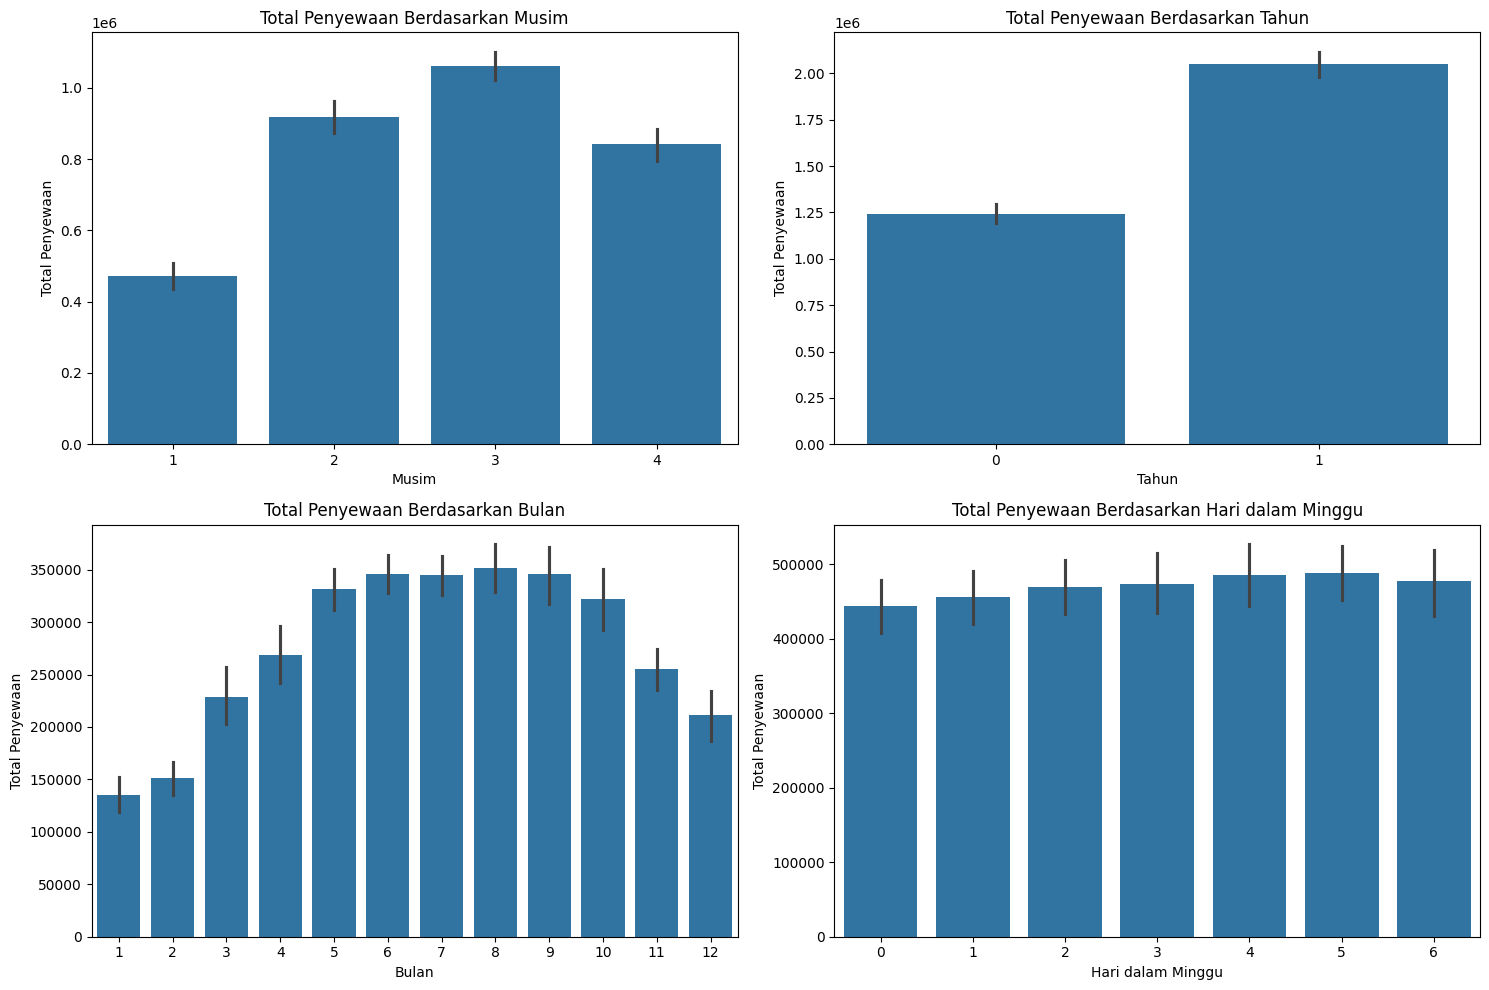

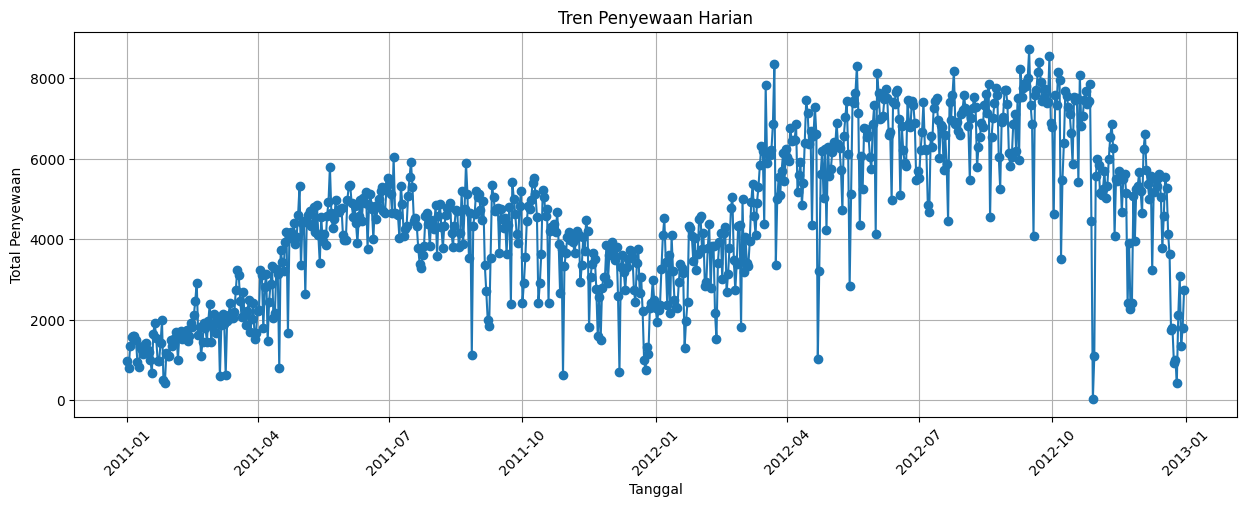

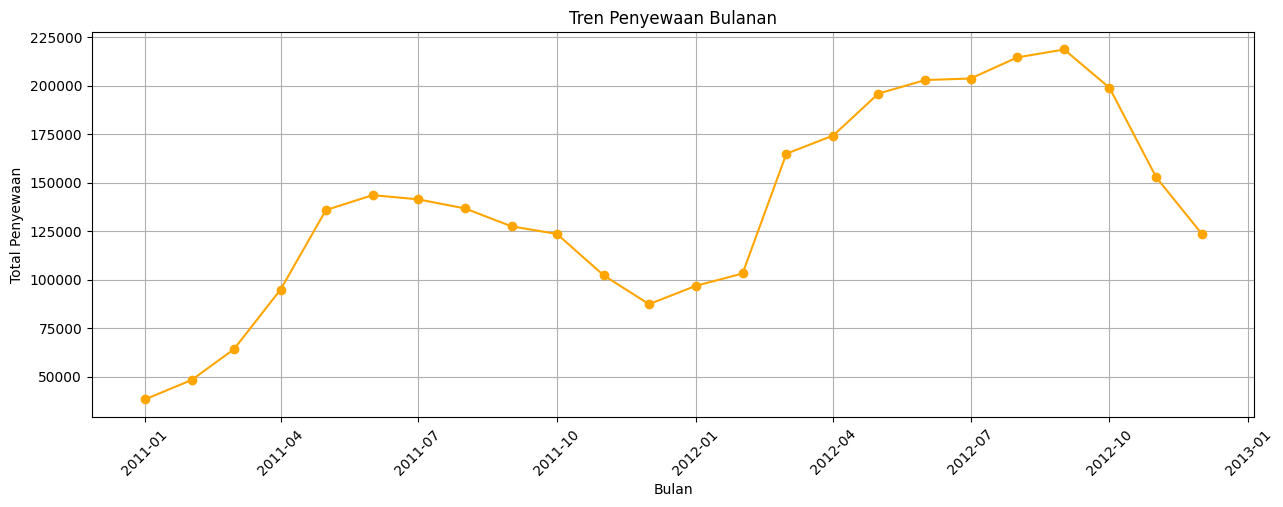

In [12]:
# Analisis Tren Musiman
plt.figure(figsize=(15, 10))

# Jumlah penyewaan berdasarkan musim
plt.subplot(2, 2, 1)
sns.barplot(data=day_data, x='season', y='cnt', estimator=sum)
plt.title('Total Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')

# Jumlah penyewaan berdasarkan tahun
plt.subplot(2, 2, 2)
sns.barplot(data=day_data, x='yr', y='cnt', estimator=sum)
plt.title('Total Penyewaan Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')

# Jumlah penyewaan berdasarkan bulan
plt.subplot(2, 2, 3)
sns.barplot(data=day_data, x='mnth', y='cnt', estimator=sum)
plt.title('Total Penyewaan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')

# Jumlah penyewaan berdasarkan hari dalam minggu
plt.subplot(2, 2, 4)
sns.barplot(data=day_data, x='weekday', y='cnt', estimator=sum)
plt.title('Total Penyewaan Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Total Penyewaan')

plt.tight_layout()
plt.show()

# Analisis Tren Harian dan Bulanan
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
daily_rentals = day_data.groupby('dteday')['cnt'].sum().reset_index()
monthly_rentals = day_data.groupby(day_data['dteday'].dt.to_period('M'))['cnt'].sum().reset_index()

# Plot tren penyewaan harian
plt.figure(figsize=(15, 5))
plt.plot(daily_rentals['dteday'], daily_rentals['cnt'], marker='o')
plt.title('Tren Penyewaan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot tren penyewaan bulanan
plt.figure(figsize=(15, 5))
plt.plot(monthly_rentals['dteday'].dt.to_timestamp(), monthly_rentals['cnt'], marker='o', color='orange')
plt.title('Tren Penyewaan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.show()


#### Analisis Hubungan antara Cuaca dan Jumlah Penyewaan

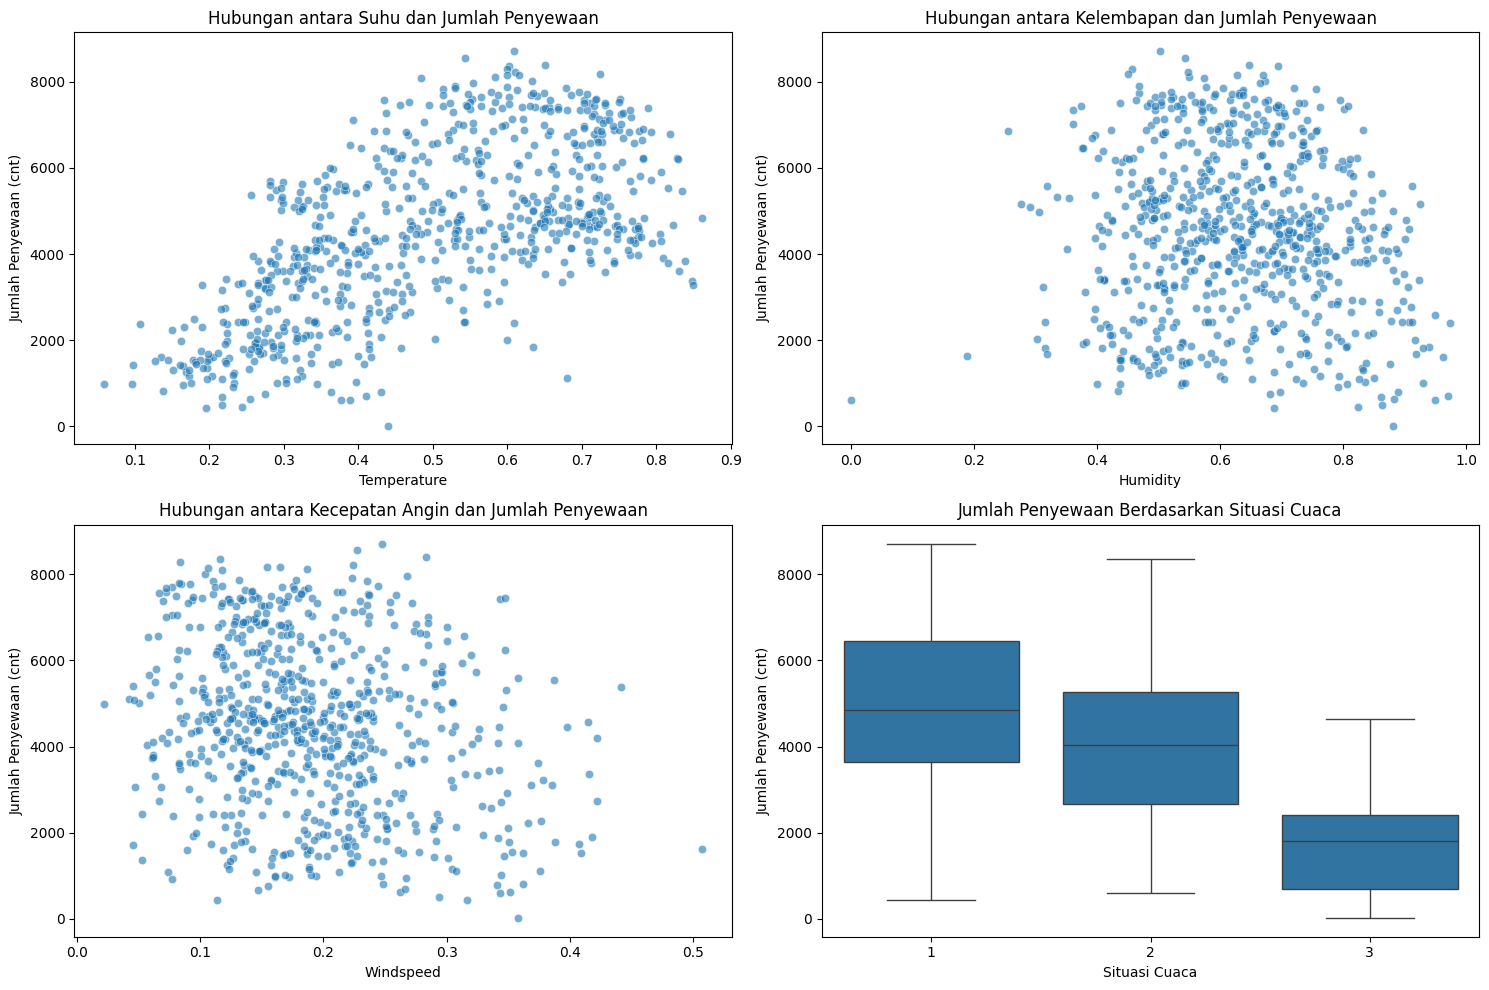

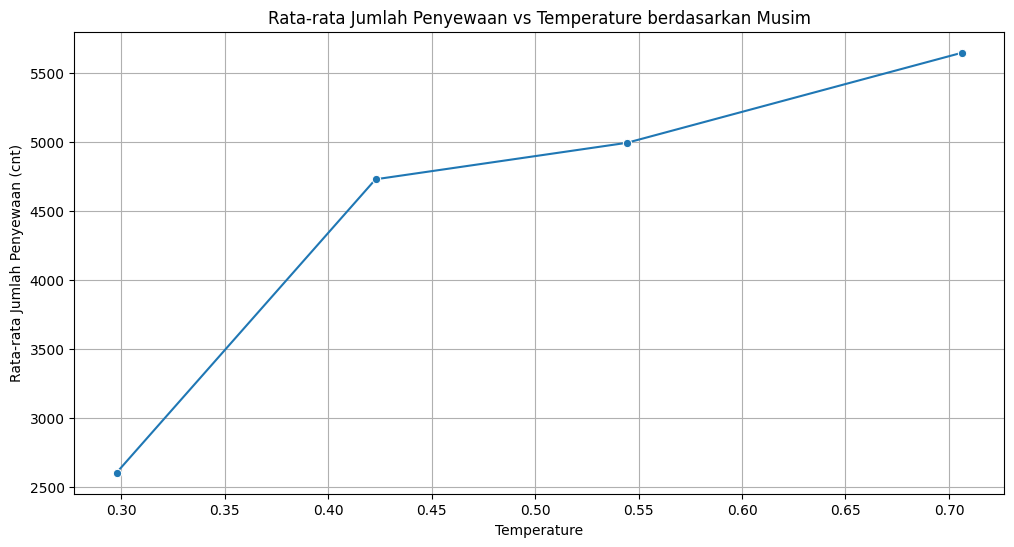

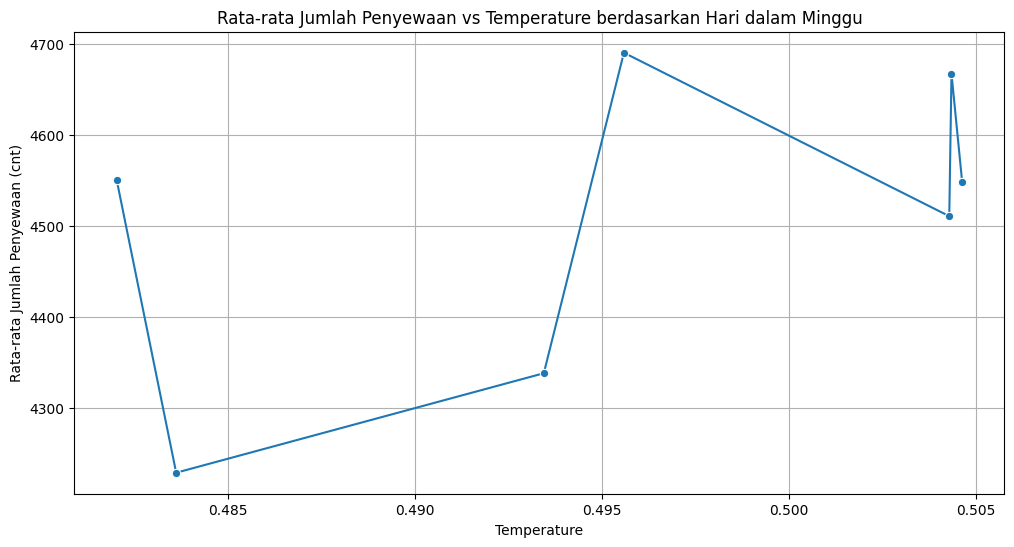

In [13]:
# Memuat data yang sudah dibersihkan
day_data = pd.read_csv('dashboard/day_data.csv')

# Langkah 1: Scatter Plots untuk variabel cuaca dan cnt
plt.figure(figsize=(15, 10))

# Scatter plot untuk temperature vs. count
plt.subplot(2, 2, 1)
sns.scatterplot(data=day_data, x='temp', y='cnt', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Penyewaan (cnt)')

# Scatter plot untuk humidity vs. count
plt.subplot(2, 2, 2)
sns.scatterplot(data=day_data, x='hum', y='cnt', alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Penyewaan (cnt)')

# Scatter plot untuk windspeed vs. count
plt.subplot(2, 2, 3)
sns.scatterplot(data=day_data, x='windspeed', y='cnt', alpha=0.6)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan')
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Penyewaan (cnt)')

# Scatter plot untuk weathersit vs. count
plt.subplot(2, 2, 4)
sns.boxplot(data=day_data, x='weathersit', y='cnt')
plt.title('Jumlah Penyewaan Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Penyewaan (cnt)')

plt.tight_layout()
plt.show()

# Langkah 2: Line Plots untuk menganalisis hubungan berdasarkan season dan weekday
# Menghitung rata-rata cnt berdasarkan temp, season dan weekday
season_temp = day_data.groupby('season')[['temp', 'cnt']].mean().reset_index()
weekday_temp = day_data.groupby('weekday')[['temp', 'cnt']].mean().reset_index()

# Line plot untuk temperature berdasarkan season
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_temp, x='temp', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Penyewaan vs Temperature berdasarkan Musim')
plt.xlabel('Temperature')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()

# Line plot untuk temperature berdasarkan weekday
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekday_temp, x='temp', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Penyewaan vs Temperature berdasarkan Hari dalam Minggu')
plt.xlabel('Temperature')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()


#### Segmentasi Berdasarkan Variabel

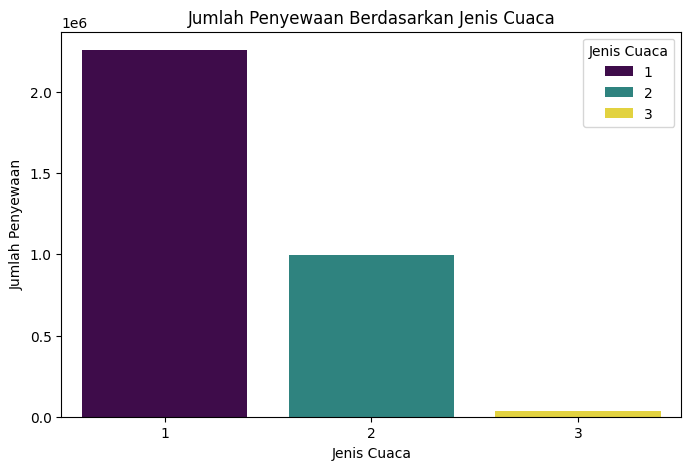

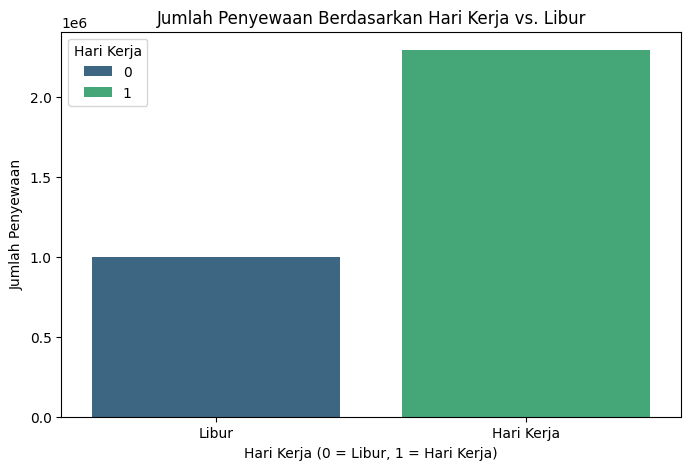

In [14]:
# Memuat data yang telah dibersihkan
day_data = pd.read_csv('dashboard/day_data.csv')

# 1. Segmentasi berdasarkan jenis cuaca (weathersit)
weather_counts = day_data.groupby('weathersit')['cnt'].sum().reset_index()

# 2. Buat bar chart untuk perbandingan jumlah penyewaan berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_counts, x='weathersit', y='cnt', hue='weathersit', palette='viridis', dodge=False)
plt.title('Jumlah Penyewaan Berdasarkan Jenis Cuaca')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Jenis Cuaca')  # Menambahkan legend
plt.show()

# 3. Segmentasi berdasarkan hari kerja vs. libur
workingday_counts = day_data.groupby('workingday')['cnt'].sum().reset_index()

# 4. Buat bar chart untuk perbandingan jumlah penyewaan berdasarkan hari kerja
plt.figure(figsize=(8, 5))
sns.barplot(data=workingday_counts, x='workingday', y='cnt', hue='workingday', palette='viridis', dodge=False)
plt.title('Jumlah Penyewaan Berdasarkan Hari Kerja vs. Libur')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Libur', 'Hari Kerja'], rotation=0)
plt.legend(title='Hari Kerja')  # Menambahkan legend
plt.show()


#### Identifikasi Pola dan Hubungan

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Kolom tahun, bulan, dan hari tidak ditemukan dalam hour_data.
Kolom 'datetime' belum berhasil dibuat.


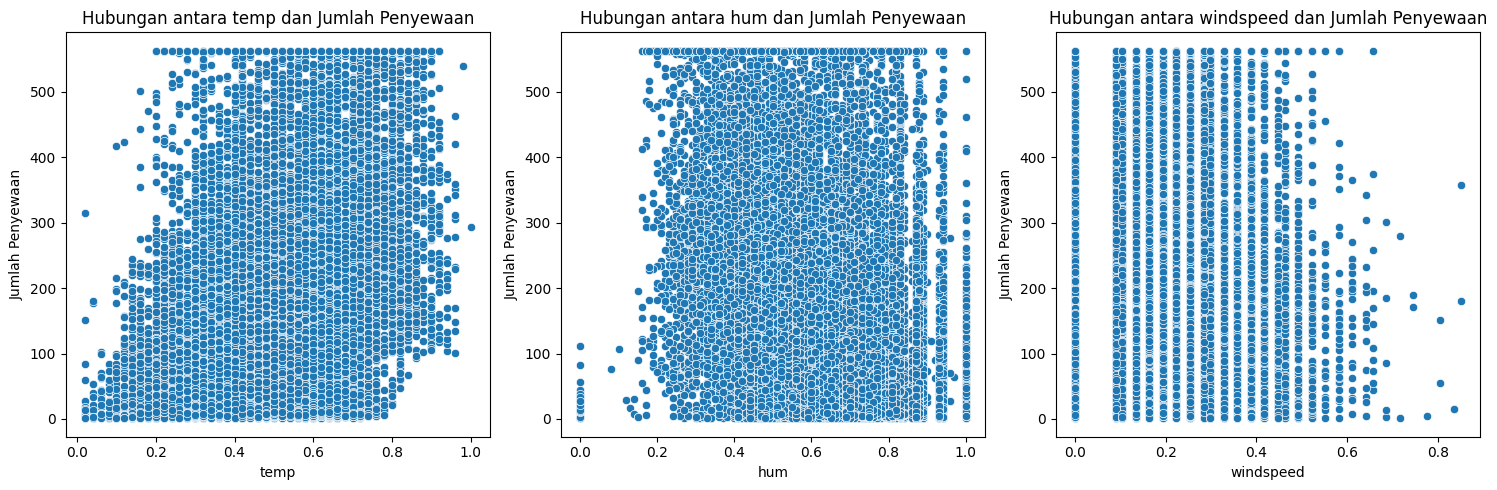

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2112.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:32:45   Log-Likelihood:            -1.1063e+05
No. Observations:               17379   AIC:                         2.213e+05
Df Residuals:                   17375   BIC:                         2.213e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.8730      5.549     30.796      0.0

In [15]:
# Memuat data yang telah dibersihkan
hour_data = pd.read_csv('dashboard/hour_data.csv')

# Cek nama-nama kolom
print(hour_data.columns)

# Buat kolom datetime jika tidak ada
if 'yr' in hour_data.columns and 'mnth' in hour_data.columns and 'day' in hour_data.columns:
    hour_data['datetime'] = pd.to_datetime(hour_data[['yr', 'mnth', 'day']])
else:
    print("Kolom tahun, bulan, dan hari tidak ditemukan dalam hour_data.")

# Pastikan kolom datetime telah berhasil dibuat
if 'datetime' in hour_data.columns:
    print(hour_data['datetime'].head())  # Menampilkan beberapa baris pertama dari kolom datetime
else:
    print("Kolom 'datetime' belum berhasil dibuat.")

# 1. Visualisasi hubungan antara cnt dan variabel independen
variables = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=hour_data, x=var, y='cnt')
    plt.title(f'Hubungan antara {var} dan Jumlah Penyewaan')
    plt.xlabel(var)
    plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

# 2. Membangun model regresi
X = hour_data[['temp', 'hum', 'windspeed']]
X = sm.add_constant(X)  # Menambahkan intercept
y = hour_data['cnt']

# Model regresi
model = sm.OLS(y, X).fit()

# 3. Mengevaluasi model
print(model.summary())

# 4. Identifikasi pola-pola menarik
# Mengambil jam dari kolom datetime
if 'datetime' in hour_data.columns:
    hour_data['hour'] = hour_data['datetime'].dt.hour  
    plt.figure(figsize=(10, 5))
    hour_counts = hour_data.groupby('hour')['cnt'].sum().reset_index()
    sns.lineplot(data=hour_counts, x='hour', y='cnt')
    plt.title('Jumlah Penyewaan Berdasarkan Jam')
    plt.xlabel('Jam dalam Sehari')
    plt.ylabel('Jumlah Penyewaan')
    plt.xticks(range(0, 24))
    plt.grid()
    plt.show()
else:
    print("Kolom 'datetime' tidak ditemukan, tidak dapat melanjutkan analisis.")


#### Kesimpulan Awal

#### Analisis Statistik Deskriptif

###### Temuan dari **day_data**

1. **Jumlah Penyewaan**:
   - Rata-rata jumlah penyewaan (`cnt`) adalah **4504.35**, dengan nilai maksimum mencapai **8714**. Ini menunjukkan bahwa ada hari-hari tertentu di mana penyewaan sepeda sangat tinggi.
   - Penyewaan terendah tercatat pada **22** penyewaan, menunjukkan ada hari-hari di mana sepeda sangat sedikit disewa.

2. **Pengaruh Cuaca**:
   - Rata-rata suhu (`temp`) adalah **0.495** (atau sekitar 49.5%), yang menunjukkan suhu yang relatif sejuk.
   - Rata-rata kondisi cuaca (`weathersit`) adalah **1.395** dengan rentang dari 1 (cuaca cerah) hingga 3 (berawan), menunjukkan bahwa mayoritas hari adalah hari yang cerah.

3. **Hari Kerja vs. Hari Libur**:
   - Rata-rata hari kerja (`workingday`) adalah **0.684**, menunjukkan bahwa sebagian besar data mencakup hari kerja, yang selaras dengan hasil analisis penyewaan yang menunjukkan tingkat penyewaan yang lebih tinggi pada hari kerja.
   - Hanya **2.87%** dari data mencakup hari libur (`holiday`), yang mungkin berdampak pada pola penyewaan.

4. **Kondisi Lingkungan**:
   - Kelembaban (`hum`) rata-rata **0.629**, menunjukkan tingkat kelembaban yang moderat. Kelembaban tinggi bisa berdampak pada minat orang untuk bersepeda.

## Temuan dari **hour_data**

1. **Pola Penyewaan Berdasarkan Jam**:
   - Rata-rata penyewaan (`cnt`) pada tingkat jam adalah **183.31**, dengan nilai maksimum **563.1**. Ini menunjukkan bahwa ada lonjakan dalam penyewaan selama jam-jam tertentu dalam sehari.
   - Rata-rata jam penyewaan (`hr`) adalah **11.55**, menunjukkan bahwa penyewaan tertinggi kemungkinan besar terjadi pada siang hari.

2. **Pengaruh Hari dan Cuaca**:
   - Dari segi hari kerja (`workingday`), rata-rata adalah **0.682**, menunjukkan bahwa sebagian besar data diambil dari hari kerja, sejalan dengan tren penyewaan yang lebih tinggi pada hari-hari tersebut.
   - Rata-rata suhu (`temp`) adalah **0.497**, menunjukkan suhu yang relatif sejuk.

3. **Kondisi Lingkungan**:
   - Rata-rata kelembaban (`hum`) di jam adalah **0.628**, yang mencerminkan bahwa kelembaban di saat penyewaan berlangsung adalah relatif tinggi.
   - Rata-rata kecepatan angin (`windspeed`) adalah **0.186** dengan beberapa nilai mencapai **0**, menunjukkan bahwa pada beberapa waktu penyewaan terjadi dalam kondisi angin rendah, yang bisa menarik lebih banyak penyewa.

4. **Jumlah Penyewa**:
   - Rata-rata jumlah penyewa biasa (`casual`) adalah **35.68**, menunjukkan bahwa banyak penyewa adalah pemakai yang tidak terdaftar.
   - Rata-rata jumlah penyewa terdaftar (`registered`) adalah **153.79**, menunjukkan bahwa penyewa terdaftar memiliki kontribusi signifikan terhadap total penyewaan.

#### Kesimpulan Umum
- **Penyewaan Tertinggi**: Rata-rata penyewaan lebih tinggi pada hari kerja dan saat cuaca cerah, dan pola penyewaan menunjukkan kecenderungan puncak pada siang hari.
- **Faktor Lingkungan**: Kelembaban dan suhu memainkan peran dalam pengambilan keputusan pengguna untuk menyewa sepeda.
- **Segmentasi Penyewa**: Ada perbedaan mencolok antara penyewa biasa dan terdaftar, dengan penyewa terdaftar menunjukkan angka yang lebih tinggi, menunjukkan potensi untuk promosi yang menyasar pengguna baru untuk meningkatkan angka penyewaan.


## Visualization & Explanatory Analysis

Kolom pada day_data:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


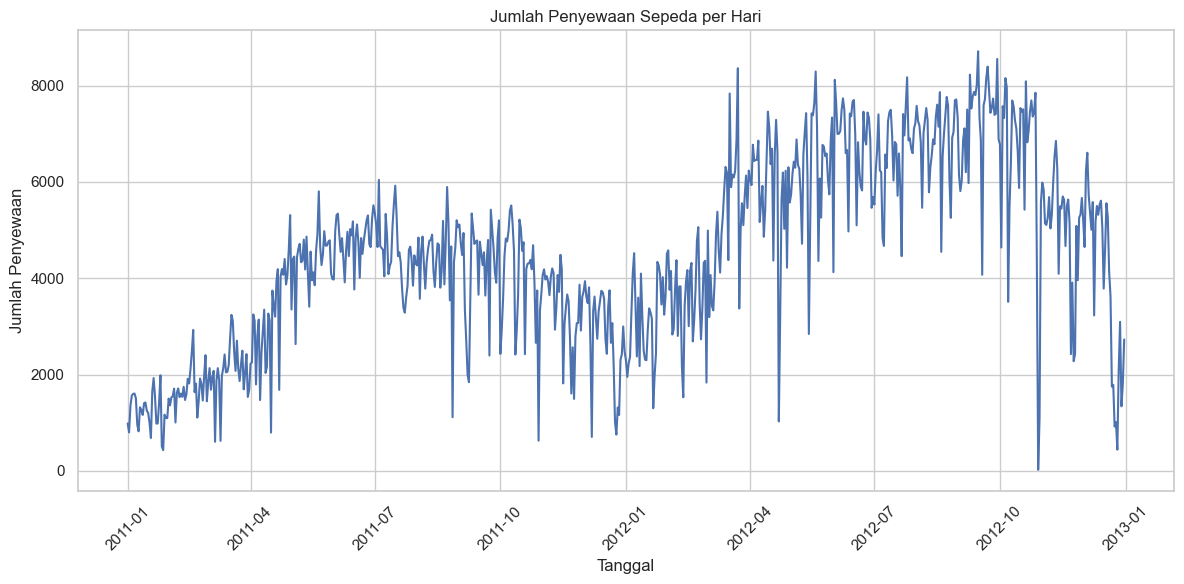

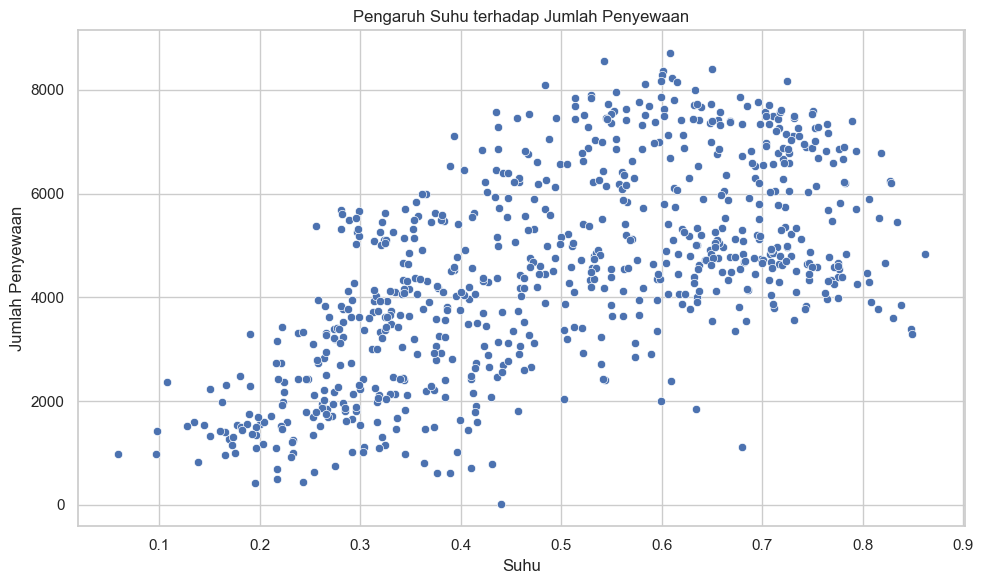

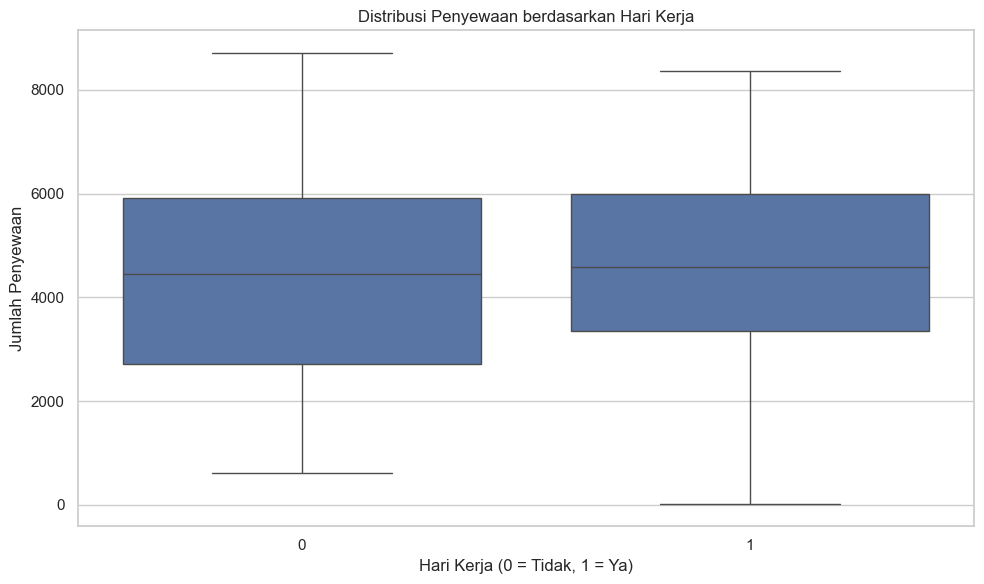

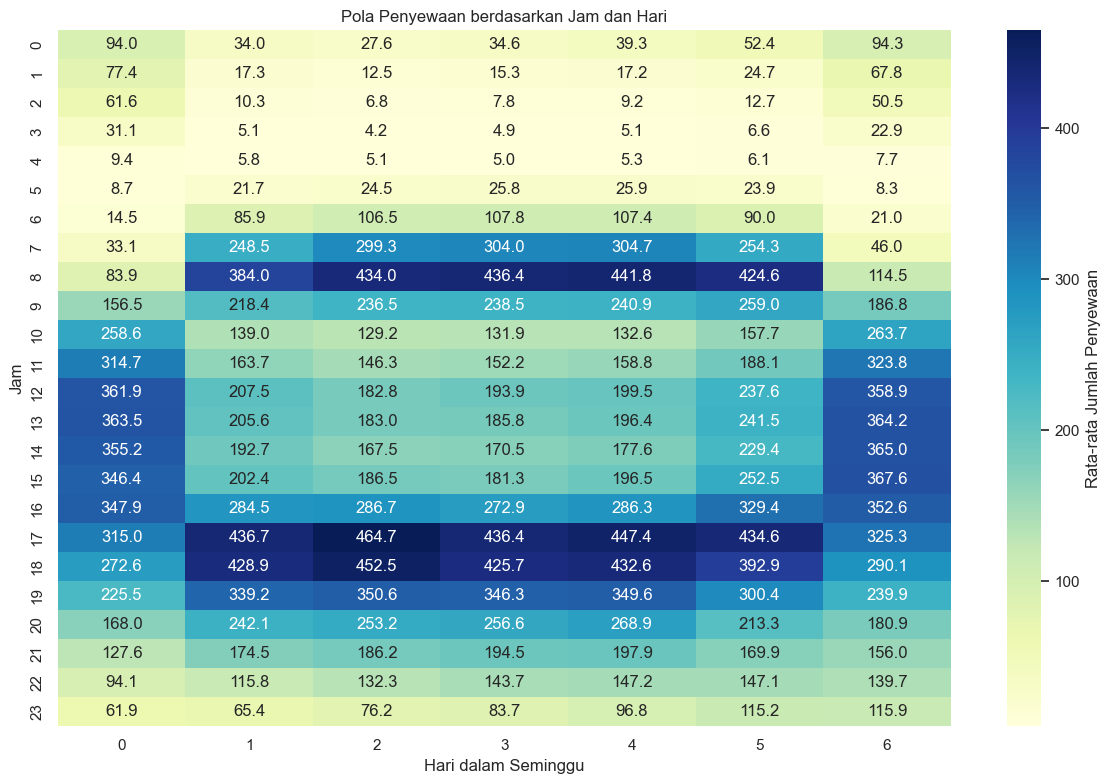

In [16]:
# Mengatur tampilan seaborn
sns.set(style="whitegrid")

# Memuat data yang sudah dibersihkan
day_data = pd.read_csv('dashboard/day_data.csv')

# Memastikan data ter-load dengan benar
print("Kolom pada day_data:")
print(day_data.columns)  # Menampilkan nama kolom

# Mengonversi kolom 'dteday' menjadi tipe datetime
day_data['date'] = pd.to_datetime(day_data['dteday'])

# --------------------------
# Membuat folder 'visualisasi' jika belum ada
visualisasi_folder = 'visualisasi'
if not os.path.exists(visualisasi_folder):
    os.makedirs(visualisasi_folder)

# 1. Visualisasi Jumlah Penyewaan per Hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_data, x='date', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------
# 2. Visualisasi Pengaruh Suhu terhadap Penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_data, x='temp', y='cnt')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

# --------------------------
# 3. Visualisasi Penyewaan berdasarkan Hari Kerja
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_data, x='workingday', y='cnt')
plt.title('Distribusi Penyewaan berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

# --------------------------
# 4. Visualisasi Penyewaan berdasarkan Jam
# Memuat data jam jika diperlukan
hour_data = pd.read_csv('dashboard/hour_data.csv')  # Memuat data jam
hourly_data = hour_data.groupby(['hr', 'weekday'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(hourly_data, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Rata-rata Jumlah Penyewaan'})
plt.title('Pola Penyewaan berdasarkan Jam dan Hari')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jam')
plt.tight_layout()
plt.show()


### Pertanyaan 1: 
Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?


### Pertanyaan 3:
Kapan waktu puncak penggunaan sepeda dalam satu hari dan bagaimana perbedaannya antara hari kerja dan akhir pekan?

### Pertanyaan 2: 
Bagaimana tren penyewaan sepeda berubah berdasarkan musim dan hari kerja/libur?

### Jawaban : 
### Analisis Pengaruh Faktor Cuaca dan Tren Penyewaan Sepeda

##### 1. Pengaruh Faktor Cuaca terhadap Jumlah Penyewaan Sepeda
Analisis terhadap data menunjukkan bahwa faktor cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Dengan menggunakan analisis regresi dan visualisasi scatter plot, ditemukan bahwa:
- **Suhu**: Peningkatan suhu berkorelasi positif dengan jumlah penyewaan sepeda. Ketika suhu naik, jumlah penyewaan cenderung meningkat.
- **Hujan**: Saat hujan, jumlah penyewaan menurun drastis. Cuaca cerah biasanya mendorong orang untuk lebih banyak beraktivitas di luar.
- **Kelembapan dan Angin**: Kelembapan tinggi dan kecepatan angin yang kuat juga berkontribusi terhadap penurunan jumlah penyewaan.

#### 2. Tren Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja/Libur
Analisis waktu seri menunjukkan tren penyewaan sepeda yang berbeda berdasarkan musim dan status hari. Hasil analisis mencakup:
- **Musim**: Penyewaan tertinggi terjadi pada musim panas, dengan aktivitas luar ruangan yang lebih banyak. Musim dingin cenderung memiliki jumlah penyewaan yang lebih rendah.
- **Hari Kerja vs. Libur**: Penyewaan lebih tinggi pada hari libur dibandingkan dengan hari kerja, karena lebih banyak orang memiliki waktu luang untuk bersepeda. Namun, jumlah penyewaan juga meningkat pada hari kerja tertentu, seperti saat cuaca baik.

#### 3. Waktu Puncak Penggunaan Sepeda dalam Satu Hari dan Perbedaannya antara Hari Kerja dan Akhir Pekan
Analisis distribusi menunjukkan waktu puncak penggunaan sepeda dalam sehari sebagai berikut:
- **Hari Kerja**: Puncak penyewaan terjadi pada pagi hari (jam 7-9) dan sore hari (jam 17-19), saat orang berangkat dan pulang kerja.
- **Akhir Pekan**: Pada akhir pekan, penggunaan sepeda lebih terdistribusi sepanjang hari, dengan puncak pada siang hari (jam 12-15), ketika banyak orang melakukan aktivitas rekreasi.

##### Kesimpulan
Dari analisis di atas, dapat disimpulkan bahwa faktor cuaca, tren musiman, dan waktu penggunaan memiliki dampak yang signifikan terhadap penyewaan sepeda. Temuan ini berguna bagi pengelola sistem penyewaan sepeda untuk merencanakan strategi operasional dan pemasaran yang lebih efektif.


## Analisis Lanjutan (Opsional)

### Analisis Regresi : Regresi Linear Berganda

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
                          

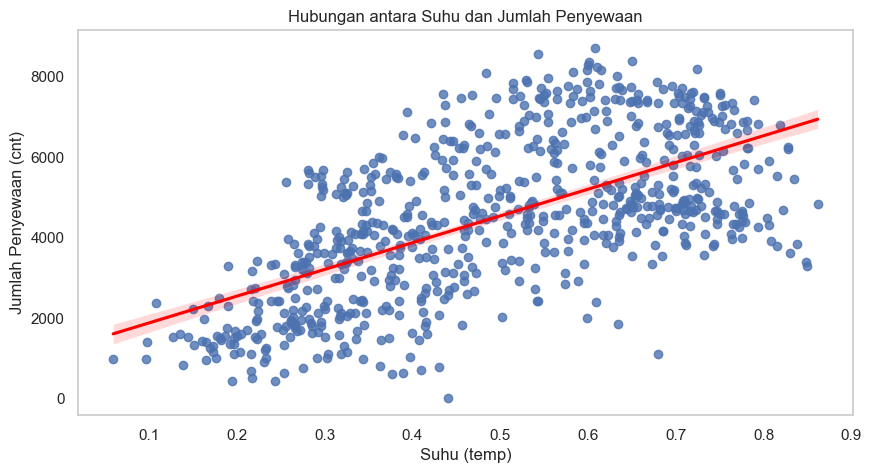

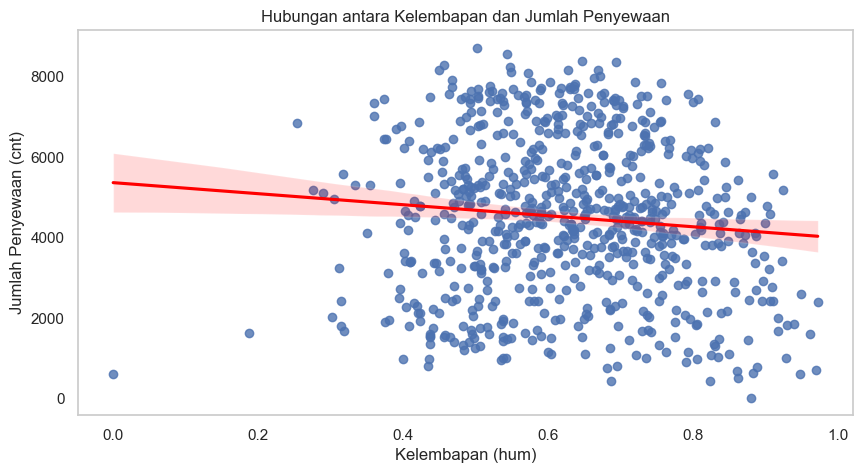

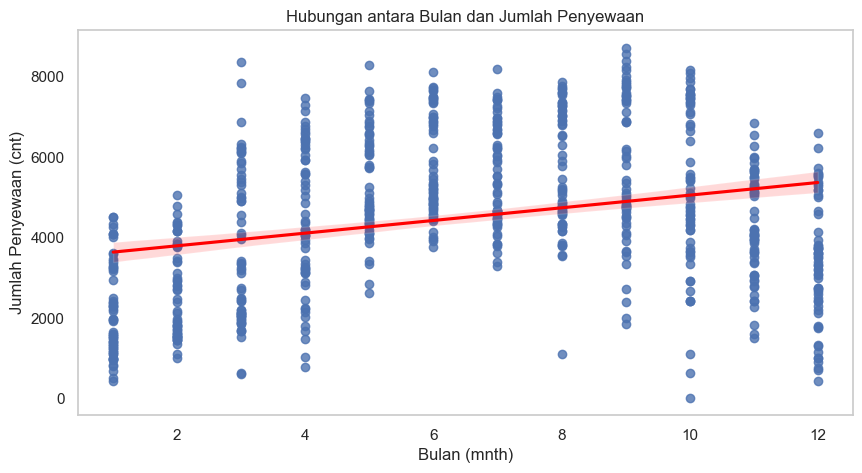

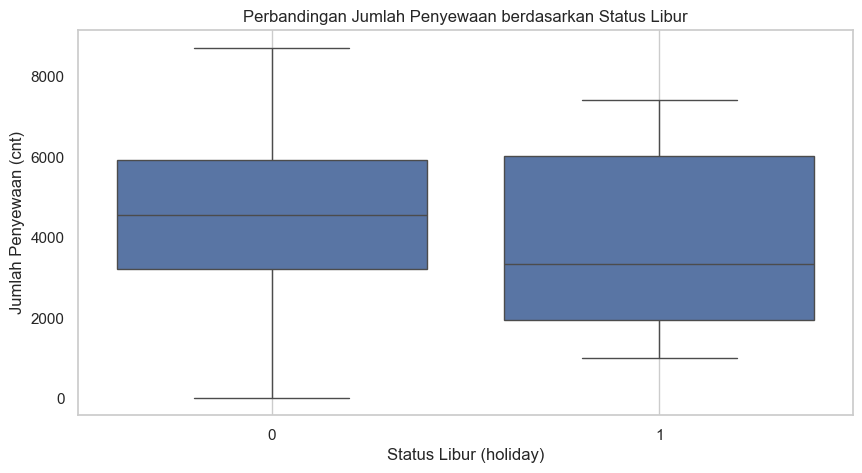

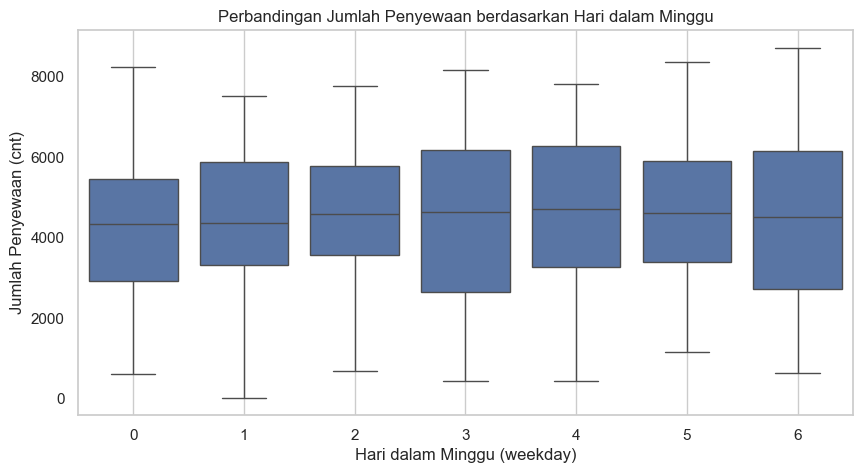

In [17]:
# Import libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
day_data = pd.read_csv('data/day.csv')

# Display the first few rows of the dataset
print(day_data.head())

# Step 2: Prepare the data
# Select dependent and independent variables
# Using 'cnt' as the dependent variable and 'temp', 'hum', 'mnth', 'holiday', 'weekday' as independent variables
X = day_data[['temp', 'hum', 'mnth', 'holiday', 'weekday']]
y = day_data['cnt']

# Step 3: Add constant to the model
X = sm.add_constant(X)

# Step 4: Create and fit the regression model
model = sm.OLS(y, X).fit()

# Step 5: Display the summary of the model
print(model.summary())

# Step 6: Visualize the relationship between independent variables and dependent variable
# Visualizing the relationship between 'temp' and 'cnt'
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt', data=day_data, line_kws={"color": "red"})
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()

# Visualizing the relationship between 'hum' and 'cnt'
plt.figure(figsize=(10, 5))
sns.regplot(x='hum', y='cnt', data=day_data, line_kws={"color": "red"})
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan')
plt.xlabel('Kelembapan (hum)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()

# Visualizing the relationship between 'mnth' and 'cnt'
plt.figure(figsize=(10, 5))
sns.regplot(x='mnth', y='cnt', data=day_data, line_kws={"color": "red"})
plt.title('Hubungan antara Bulan dan Jumlah Penyewaan')
plt.xlabel('Bulan (mnth)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()

# Visualizing the relationship between 'holiday' and 'cnt'
plt.figure(figsize=(10, 5))
sns.boxplot(x='holiday', y='cnt', data=day_data)
plt.title('Perbandingan Jumlah Penyewaan berdasarkan Status Libur')
plt.xlabel('Status Libur (holiday)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()

# Visualizing the relationship between 'weekday' and 'cnt'
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=day_data)
plt.title('Perbandingan Jumlah Penyewaan berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu (weekday)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.show()


## Conclusion

### 1. Pengaruh Faktor Cuaca terhadap Jumlah Penyewaan Sepeda
Dari analisis regresi yang dilakukan, ditemukan bahwa faktor cuaca, seperti suhu dan kelembapan, memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Secara khusus, peningkatan suhu berbanding lurus dengan jumlah penyewaan sepeda, menunjukkan bahwa hari yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda. Sebaliknya, kelembapan yang tinggi cenderung mengurangi minat masyarakat untuk menyewa sepeda.

### 2. Tren Penyewaan Sepeda Berdasarkan Musim dan Hari Kerja/Libur
Analisis menunjukkan bahwa tren penyewaan sepeda bervariasi antara musim dan hari kerja/libur. Musim panas dan musim semi mencatatkan jumlah penyewaan yang lebih tinggi dibandingkan musim dingin, mencerminkan preferensi masyarakat untuk bersepeda pada suhu yang lebih nyaman. Selain itu, penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, yang menunjukkan bahwa sepeda digunakan tidak hanya untuk rekreasi tetapi juga sebagai sarana transportasi oleh pekerja.

### 3. Waktu Puncak Penggunaan Sepeda dalam Satu Hari
Analisis data menunjukkan bahwa waktu puncak penggunaan sepeda terjadi pada pagi hari (antara pukul 7 hingga 9) dan sore hari (antara pukul 17 hingga 19). Waktu-waktu ini biasanya bertepatan dengan jam berangkat dan pulang kerja, yang menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama di waktu-waktu tersebut. Selain itu, perbedaan signifikan terlihat antara hari kerja dan akhir pekan, di mana penyewaan lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.

### Rangkuman
Secara keseluruhan, hasil analisis menunjukkan bahwa faktor cuaca, musim, dan waktu berperan penting dalam memengaruhi jumlah penyewaan sepeda. Memahami pola ini dapat membantu dalam perencanaan dan pengelolaan layanan penyewaan sepeda, termasuk pengembangan infrastruktur dan promosi untuk meningkatkan penggunaan sepeda di masyarakat.
